https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE84133

The datasets include a Human dataset and a Mouse dataset, and they are processed separately.

In [ ]:
!pip install scanpy anndata

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 26.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.7/142.7 kB 14.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.6/83.6 kB 8.2 MB/s eta 0:00:00
  Created wheel for session-info: filename=session_info-1.0.0-py3-none-any.whl size=8023 sha256=b09a9feb6675caac53bdeb898b848f706606d9090d84a806ed5a3d71db7dc090
  Stored in directory: /root/.cache/pip/wheels/4e/56/35/a748fc57279a4b84d0b332879445fed1ad8478e7257986b015
Successfully built session-info


In [ ]:
%pylab inline

import warnings
warnings.filterwarnings("ignore")

Populating the interactive namespace from numpy and matplotlib


In [ ]:
import os
import scanpy as sc
import scipy
from scipy import sparse
import pandas as pd
from glob import iglob


## Read in data

In [ ]:
import os
os.system("wget -O data.tar \
'https://www.ncbi.nlm.nih.gov/geo/download/?acc=GSE84133&format=file'")
os.system("tar -xvf data.tar")

0

# Human

### download counts

In [ ]:
cts1 = []
cts2 = []
cts3 = []

for f in iglob("GSM*_human*_umifm_counts.csv.gz"):
    cts = pd.read_csv(f, sep=',', compression='gzip', index_col=0)
    if "human1" in f:
        cts1.append(cts)
    elif "human2" in f:
        cts2.append(cts)
    elif "human3" in f:
        cts3.append(cts)

In [ ]:
cts1 = pd.concat(cts1, axis=0) if cts1 else None
cts2 = pd.concat(cts2, axis=0) if cts2 else None
cts3 = pd.concat(cts3, axis=0) if cts3 else None

In [ ]:
cts1.head()

,barcode,assigned_cluster,A1BG,A1CF,A2M,A2ML1,A4GALT,A4GNT,AA06,AAAS,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11B,ZYX,ZZEF1,ZZZ3,pk
human1_lib1.final_cell_0001,GATGACGGAC-GGTGGGAT,acinar,0,4,0,0,0,0,0,0,...,0,0,0,0,0,0,2,0,0,1
human1_lib1.final_cell_0002,GAGCGTTGCT-ACCTTCTT,acinar,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,4,0,1,0
human1_lib1.final_cell_0003,CTTACGGG-CCATTACT,acinar,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
human1_lib1.final_cell_0004,GATGTACACG-TTAAACTG,acinar,0,0,0,0,0,0,0,1,...,1,0,0,0,0,1,3,1,0,0
human1_lib1.final_cell_0005,GAGATTGCGA-GTCGTCGT,acinar,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1


In [ ]:
print("cts1 shape:", cts1.shape if cts1 is not None else "Empty")
print("cts2 shape:", cts2.shape if cts2 is not None else "Empty")
print("cts3 shape:", cts3.shape if cts3 is not None else "Empty")

cts1 shape: (1937, 20127)
cts2 shape: (1724, 20127)
cts3 shape: (3605, 20127)


In [ ]:
obs1 = cts1.iloc[:,:2]
obs2 = cts2.iloc[:,:2]
obs3 = cts3.iloc[:,:2]

In [ ]:
obs1.head()

,barcode,assigned_cluster
human1_lib1.final_cell_0001,GATGACGGAC-GGTGGGAT,acinar
human1_lib1.final_cell_0002,GAGCGTTGCT-ACCTTCTT,acinar
human1_lib1.final_cell_0003,CTTACGGG-CCATTACT,acinar
human1_lib1.final_cell_0004,GATGTACACG-TTAAACTG,acinar
human1_lib1.final_cell_0005,GAGATTGCGA-GTCGTCGT,acinar


In [ ]:
cts1 = cts1.iloc[:,2:]
cts2 = cts2.iloc[:,2:]
cts3 = cts3.iloc[:,2:]

In [ ]:
ad1 = sc.AnnData(X=scipy.sparse.csr_matrix(cts1.values))
ad1.obs_names = cts1.index
ad1.var_names = cts1.columns
for col in obs1.columns:
    ad1.obs[col] = obs1[col]

In [ ]:
ad2 = sc.AnnData(X=scipy.sparse.csr_matrix(cts2.values))
ad2.obs_names = cts2.index
ad2.var_names = cts2.columns
for col in obs2.columns:
    ad2.obs[col] = obs2[col]

In [ ]:
ad3 = sc.AnnData(X=scipy.sparse.csr_matrix(cts3.values))
ad3.obs_names = cts3.index
ad3.var_names = cts3.columns
for col in obs3.columns:
    ad3.obs[col] = obs3[col]

In [ ]:
ad1.raw = sc.pp.log1p(ad1,copy=True)
ad2.raw = sc.pp.log1p(ad2,copy=True)
ad3.raw = sc.pp.log1p(ad3,copy=True)

In [ ]:
ad1.shape

(1937, 20125)

In [ ]:
ad2.shape

(1724, 20125)

In [ ]:
ad3.shape

(3605, 20125)

In [ ]:
ad1.obs['lib'] = ad1.obs_names.str.split('.').str[0]
ad1.obs['lib'] = ad1.obs['lib'].astype('category')

ad1.obs['donor'] = ad1.obs_names.str.split('_').str[0]
ad1.obs['donor'] = ad1.obs['donor'].astype('category')

In [ ]:
ad2.obs['lib'] = ad2.obs_names.str.split('.').str[0]
ad2.obs['lib'] = ad2.obs['lib'].astype('category')

ad2.obs['donor'] = ad2.obs_names.str.split('_').str[0]
ad2.obs['donor'] = ad2.obs['donor'].astype('category')

In [ ]:
ad3.obs['lib'] = ad3.obs_names.str.split('.').str[0]
ad3.obs['lib'] = ad3.obs['lib'].astype('category')

ad3.obs['donor'] = ad3.obs_names.str.split('_').str[0]
ad3.obs['donor'] = ad3.obs['donor'].astype('category')

In [ ]:
ad1.obs['cell_type'] = ad1.obs['assigned_cluster']
ad1.obs['cell_type'].value_counts()

,count
cell_type,
beta,872
alpha,236
delta,214
endothelial,130
ductal,120
acinar,110
quiescent_stellate,92
gamma,70
activated_stellate,51


In [ ]:
ad2.obs['cell_type'] = ad2.obs['assigned_cluster']
ad2.obs['cell_type'].value_counts()

,count
cell_type,
alpha,676
beta,371
ductal,301
delta,125
gamma,86
activated_stellate,81
endothelial,23
quiescent_stellate,22
macrophage,17


In [ ]:
ad3.obs['cell_type'] = ad3.obs['assigned_cluster']
ad3.obs['cell_type'].value_counts()

,count
cell_type,
alpha,1130
acinar,843
beta,787
ductal,376
delta,161
activated_stellate,100
endothelial,92
quiescent_stellate,54
gamma,36


In [ ]:
ad1.obs

,barcode,assigned_cluster,lib,donor,cell_type
human1_lib1.final_cell_0001,GATGACGGAC-GGTGGGAT,acinar,human1_lib1,human1,acinar
human1_lib1.final_cell_0002,GAGCGTTGCT-ACCTTCTT,acinar,human1_lib1,human1,acinar
human1_lib1.final_cell_0003,CTTACGGG-CCATTACT,acinar,human1_lib1,human1,acinar
human1_lib1.final_cell_0004,GATGTACACG-TTAAACTG,acinar,human1_lib1,human1,acinar
human1_lib1.final_cell_0005,GAGATTGCGA-GTCGTCGT,acinar,human1_lib1,human1,acinar
...,...,...,...,...,...
human1_lib3.final_cell_0736,GAGAGAGTAT-GATTTACC,endothelial,human1_lib3,human1,endothelial
human1_lib3.final_cell_0737,TGATTCGCTGG-CTTCTGGA,beta,human1_lib3,human1,beta
human1_lib3.final_cell_0738,GCTTACCT-GGCATGCT,endothelial,human1_lib3,human1,endothelial
human1_lib3.final_cell_0739,CGGCACAT-TGGCCTGT,beta,human1_lib3,human1,beta


In [ ]:
ad2.obs

,barcode,assigned_cluster,lib,donor,cell_type
human2_lib1.final_cell_0001,TCCAGGGA-CTGGTGCA,delta,human2_lib1,human2,delta
human2_lib1.final_cell_0002,GAAAGATTGT-TCCGTCCA,delta,human2_lib1,human2,delta
human2_lib1.final_cell_0003,AAATCAGA-AGTGATGC,alpha,human2_lib1,human2,alpha
human2_lib1.final_cell_0004,ATAGTGGAC-GAGAGTAT,delta,human2_lib1,human2,delta
human2_lib1.final_cell_0005,GACTTACTCC-AAAGCCTA,delta,human2_lib1,human2,delta
...,...,...,...,...,...
human2_lib3.final_cell_0561,CATCGCAG-GCAACCTG,activated_stellate,human2_lib3,human2,activated_stellate
human2_lib3.final_cell_0562,GAGGACTTCC-CGGACAAC,macrophage,human2_lib3,human2,macrophage
human2_lib3.final_cell_0563,GTAACGTT-ATTCCTTG,ductal,human2_lib3,human2,ductal
human2_lib3.final_cell_0564,GTGTAACC-TGTCTTTC,activated_stellate,human2_lib3,human2,activated_stellate


In [ ]:
ad3.obs

,barcode,assigned_cluster,lib,donor,cell_type
human3_lib1.final_cell_0001,TGAAAACTGGT-ATGTTGGC,acinar,human3_lib1,human3,acinar
human3_lib1.final_cell_0002,ACGGAATTT-GATCGTTT,acinar,human3_lib1,human3,acinar
human3_lib1.final_cell_0003,TGAGGCGGTTT-AAAGCCTA,acinar,human3_lib1,human3,acinar
human3_lib1.final_cell_0004,ACGTATAC-TGATAACA,acinar,human3_lib1,human3,acinar
human3_lib1.final_cell_0005,AAATGAATG-GAAAGACC,acinar,human3_lib1,human3,acinar
...,...,...,...,...,...
human3_lib4.final_cell_0895,TGACTAGTAAC-TTAAACTG,alpha,human3_lib4,human3,alpha
human3_lib4.final_cell_0896,TGCTATTT-AAACTCGA,beta,human3_lib4,human3,beta
human3_lib4.final_cell_0897,GCTTACCT-GGCCTAAG,alpha,human3_lib4,human3,alpha
human3_lib4.final_cell_0898,GACCCATAGC-CTCCGCAT,beta,human3_lib4,human3,beta


In [ ]:
obs1

,barcode,assigned_cluster
human1_lib1.final_cell_0001,GATGACGGAC-GGTGGGAT,acinar
human1_lib1.final_cell_0002,GAGCGTTGCT-ACCTTCTT,acinar
human1_lib1.final_cell_0003,CTTACGGG-CCATTACT,acinar
human1_lib1.final_cell_0004,GATGTACACG-TTAAACTG,acinar
human1_lib1.final_cell_0005,GAGATTGCGA-GTCGTCGT,acinar
...,...,...
human1_lib3.final_cell_0736,GAGAGAGTAT-GATTTACC,endothelial
human1_lib3.final_cell_0737,TGATTCGCTGG-CTTCTGGA,beta
human1_lib3.final_cell_0738,GCTTACCT-GGCATGCT,endothelial
human1_lib3.final_cell_0739,CGGCACAT-TGGCCTGT,beta


In [ ]:
obs2

,barcode,assigned_cluster
human2_lib1.final_cell_0001,TCCAGGGA-CTGGTGCA,delta
human2_lib1.final_cell_0002,GAAAGATTGT-TCCGTCCA,delta
human2_lib1.final_cell_0003,AAATCAGA-AGTGATGC,alpha
human2_lib1.final_cell_0004,ATAGTGGAC-GAGAGTAT,delta
human2_lib1.final_cell_0005,GACTTACTCC-AAAGCCTA,delta
...,...,...
human2_lib3.final_cell_0561,CATCGCAG-GCAACCTG,activated_stellate
human2_lib3.final_cell_0562,GAGGACTTCC-CGGACAAC,macrophage
human2_lib3.final_cell_0563,GTAACGTT-ATTCCTTG,ductal
human2_lib3.final_cell_0564,GTGTAACC-TGTCTTTC,activated_stellate


In [ ]:
obs3

,barcode,assigned_cluster
human3_lib1.final_cell_0001,TGAAAACTGGT-ATGTTGGC,acinar
human3_lib1.final_cell_0002,ACGGAATTT-GATCGTTT,acinar
human3_lib1.final_cell_0003,TGAGGCGGTTT-AAAGCCTA,acinar
human3_lib1.final_cell_0004,ACGTATAC-TGATAACA,acinar
human3_lib1.final_cell_0005,AAATGAATG-GAAAGACC,acinar
...,...,...
human3_lib4.final_cell_0895,TGACTAGTAAC-TTAAACTG,alpha
human3_lib4.final_cell_0896,TGCTATTT-AAACTCGA,beta
human3_lib4.final_cell_0897,GCTTACCT-GGCCTAAG,alpha
human3_lib4.final_cell_0898,GACCCATAGC-CTCCGCAT,beta


In [ ]:
ad1.obs_names

Index(['human1_lib1.final_cell_0001', 'human1_lib1.final_cell_0002',
       'human1_lib1.final_cell_0003', 'human1_lib1.final_cell_0004',
       'human1_lib1.final_cell_0005', 'human1_lib1.final_cell_0006',
       'human1_lib1.final_cell_0007', 'human1_lib1.final_cell_0008',
       'human1_lib1.final_cell_0009', 'human1_lib1.final_cell_0010',
       ...
       'human1_lib3.final_cell_0731', 'human1_lib3.final_cell_0732',
       'human1_lib3.final_cell_0733', 'human1_lib3.final_cell_0734',
       'human1_lib3.final_cell_0735', 'human1_lib3.final_cell_0736',
       'human1_lib3.final_cell_0737', 'human1_lib3.final_cell_0738',
       'human1_lib3.final_cell_0739', 'human1_lib3.final_cell_0740'],
      dtype='object', length=1937)

In [ ]:
ad1.var_names

Index(['A1BG', 'A1CF', 'A2M', 'A2ML1', 'A4GALT', 'A4GNT', 'AA06', 'AAAS',
       'AACS', 'AACSP1',
       ...
       'ZWILCH', 'ZWINT', 'ZXDA', 'ZXDB', 'ZXDC', 'ZYG11B', 'ZYX', 'ZZEF1',
       'ZZZ3', 'pk'],
      dtype='object', length=20125)

In [ ]:
ad1

AnnData object with n_obs × n_vars = 1937 × 20125
    obs: 'barcode', 'assigned_cluster', 'lib', 'donor', 'cell_type'

In [ ]:
ad2

AnnData object with n_obs × n_vars = 1724 × 20125
    obs: 'barcode', 'assigned_cluster', 'lib', 'donor', 'cell_type'

In [ ]:
sc.pp.filter_cells(ad1, min_genes=200)
sc.pp.filter_genes(ad1, min_cells=3)

In [ ]:
sc.pp.filter_cells(ad2, min_genes=200)
sc.pp.filter_genes(ad2, min_cells=3)

In [ ]:
sc.pp.filter_cells(ad3, min_genes=200)
sc.pp.filter_genes(ad3, min_cells=3)

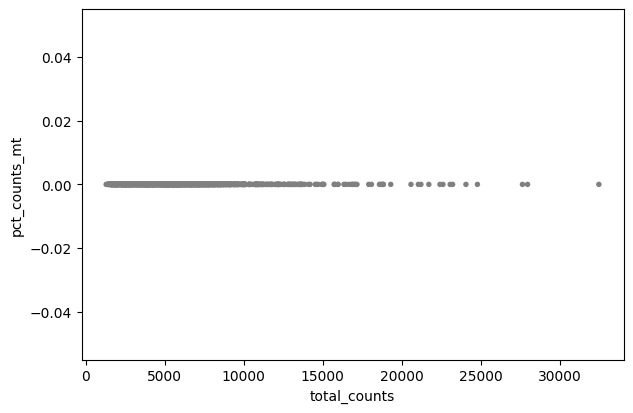

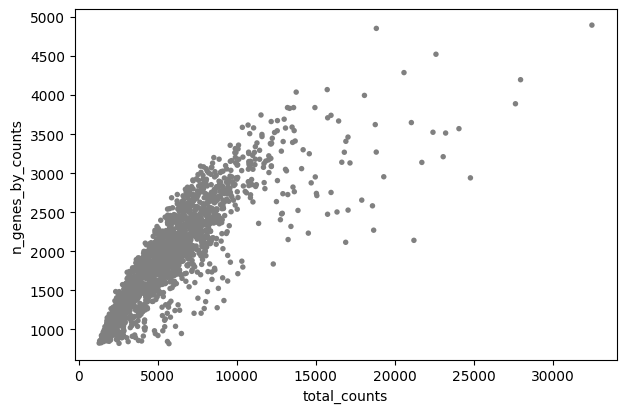

In [ ]:
ad1.var['mt'] = ad1.var_names.str.startswith('MT-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(ad1, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)
sc.pl.scatter(ad1, x='total_counts', y='pct_counts_mt')
sc.pl.scatter(ad1, x='total_counts', y='n_genes_by_counts')

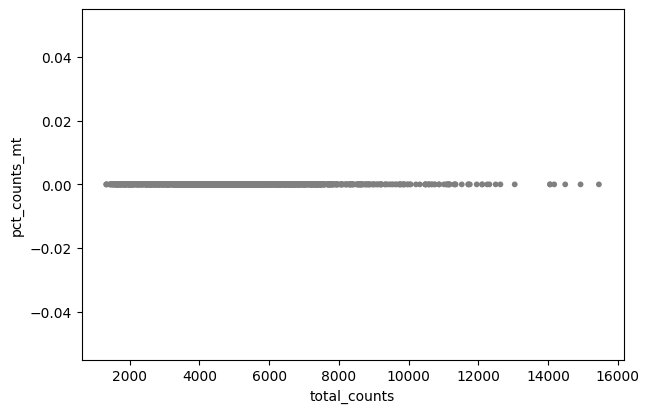

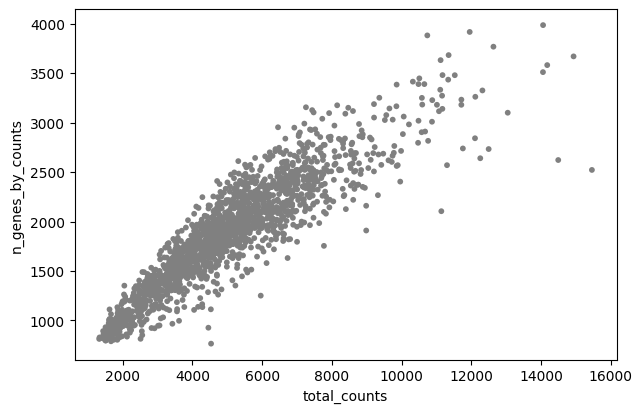

In [ ]:
ad2.var['mt'] = ad2.var_names.str.startswith('MT-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(ad2, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)
sc.pl.scatter(ad2, x='total_counts', y='pct_counts_mt')
sc.pl.scatter(ad2, x='total_counts', y='n_genes_by_counts')

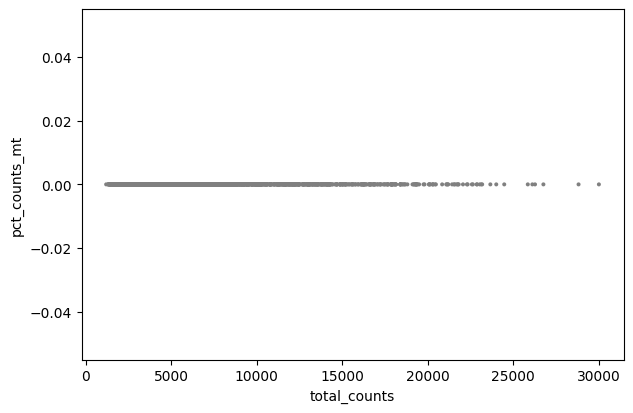

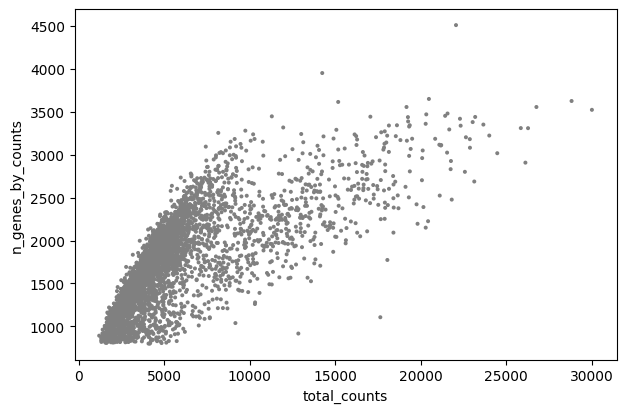

In [ ]:
ad3.var['mt'] = ad3.var_names.str.startswith('MT-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(ad3, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)
sc.pl.scatter(ad3, x='total_counts', y='pct_counts_mt')
sc.pl.scatter(ad3, x='total_counts', y='n_genes_by_counts')

In [ ]:
ad1 = ad1[ad1.obs.n_genes_by_counts < 4000, :]

In [ ]:
ad2 = ad2[ad2.obs.n_genes_by_counts < 4000, :]

In [ ]:
ad3 = ad3[ad3.obs.n_genes_by_counts < 4000, :]

In [ ]:
# connect drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
ad1.write('//content/drive/MyDrive/sc-RNA/data/processed/Baron_human1.h5')
ad2.write('//content/drive/MyDrive/sc-RNA/data/processed/Baron_human2.h5')
ad3.write('//content/drive/MyDrive/sc-RNA/data/processed/Baron_human3.h5')

# Mouse

In [ ]:
from glob import iglob
cts1=[]
cts2=[]
for f in iglob("GSM*_mouse*_umifm_counts.csv.gz"):
    print(f)
    cts= pd.read_csv(f, sep=',',compression='gzip',index_col=0)
    if "mouse1" in f:
        cts1.append(cts)
    elif "mouse2" in f:
        cts2.append(cts)

GSM2230761_mouse1_umifm_counts.csv.gz
GSM2230762_mouse2_umifm_counts.csv.gz


In [ ]:
cts1 = pd.concat(cts1, axis=0)
cts2 = pd.concat(cts2, axis=0)

In [ ]:
print("cts1 shape:", cts1.shape if cts1 is not None else "Empty")
print("cts2 shape:", cts2.shape if cts2 is not None else "Empty")

cts1 shape: (822, 14880)
cts2 shape: (1064, 14880)


In [ ]:
cts1.head()

,barcode,assigned_cluster,0610007P14Rik,0610009B22Rik,0610009E02Rik,0610009L18Rik,0610009O20Rik,0610010F05Rik,0610010K14Rik,0610011F06Rik,...,Zw10,Zwilch,Zwint,Zxdb,Zxdc,Zyg11b,Zyx,Zzef1,Zzz3,l7Rn6
mouse1_lib1.final_cell_0001,AAGTGAAAG-CGACTCCT,beta,0,0,0,0,0,2,0,1,...,0,0,1,0,0,0,0,1,0,1
mouse1_lib1.final_cell_0002,TGCAAGGG-GGCATGCT,ductal,2,0,0,0,0,1,0,1,...,0,0,1,0,0,0,1,0,0,1
mouse1_lib1.final_cell_0003,GAGAGCCCAT-CTTCTGGA,delta,0,0,1,0,0,0,0,1,...,0,0,0,0,1,0,0,1,0,2
mouse1_lib1.final_cell_0004,AAATCAGA-GTTGCACG,schwann,0,0,0,0,1,0,0,0,...,1,0,1,0,0,1,2,0,0,3
mouse1_lib1.final_cell_0005,GAGGCGTTAG-GGCTACTA,delta,1,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,1,0


In [ ]:
obs1 = cts1.iloc[:,:2]
obs2 = cts2.iloc[:,:2]

In [ ]:
obs1.head()

,barcode,assigned_cluster
mouse1_lib1.final_cell_0001,AAGTGAAAG-CGACTCCT,beta
mouse1_lib1.final_cell_0002,TGCAAGGG-GGCATGCT,ductal
mouse1_lib1.final_cell_0003,GAGAGCCCAT-CTTCTGGA,delta
mouse1_lib1.final_cell_0004,AAATCAGA-GTTGCACG,schwann
mouse1_lib1.final_cell_0005,GAGGCGTTAG-GGCTACTA,delta


In [ ]:
obs2.head()

,barcode,assigned_cluster
mouse2_lib1.final_cell_0001,GAAAGATTGT-AAACCTCC,beta
mouse2_lib1.final_cell_0002,ACTCCGCAT-GTTAACCA,beta
mouse2_lib1.final_cell_0003,AGGGAACGA-GCTTTCCA,beta
mouse2_lib1.final_cell_0004,AAATGACCC-ACTCACCG,ductal
mouse2_lib1.final_cell_0005,AAGTGAAAG-GAAGTGCC,beta


In [ ]:
cts1 = cts1.iloc[:,2:]
cts2 = cts2.iloc[:,2:]

In [ ]:
ad1 = sc.AnnData(X=scipy.sparse.csr_matrix(cts1.values).tocsc())
ad1.obs_names = cts1.index
ad1.var_names = cts1.columns
for col in obs1.columns:
    ad1.obs[col] = obs1[col]

In [ ]:
ad2 = sc.AnnData(X=scipy.sparse.csr_matrix(cts2.values).tocsc())
ad2.obs_names = cts2.index
ad2.var_names = cts2.columns
for col in obs2.columns:
    ad2.obs[col] = obs2[col]

In [ ]:
ad1.raw = sc.pp.log1p(ad1,copy=True)
ad2.raw = sc.pp.log1p(ad2,copy=True)

In [ ]:
ad1.shape

(822, 14878)

In [ ]:
ad2.shape

(1064, 14878)

In [ ]:
ad1.obs['lib'] = ad1.obs_names.str.split('.').str[0]
ad1.obs['lib'] = ad1.obs['lib'].astype('category')

ad1.obs['donor'] = ad1.obs_names.str.split('_').str[0]
ad1.obs['donor'] = ad1.obs['donor'].astype('category')

ad1.obs['cell_type'] = ad1.obs['assigned_cluster']
ad1.obs['cell_type'].value_counts()

,count
cell_type,
beta,343
ductal,236
delta,85
endothelial,72
quiescent_stellate,29
macrophage,17
gamma,14
alpha,9
immune_other,4


In [ ]:
ad2.obs['lib'] = ad2.obs_names.str.split('.').str[0]
ad2.obs['lib'] = ad2.obs['lib'].astype('category')

ad2.obs['donor'] = ad2.obs_names.str.split('_').str[0]
ad2.obs['donor'] = ad2.obs['donor'].astype('category')

ad2.obs['cell_type'] = ad2.obs['assigned_cluster']
ad2.obs['cell_type'].value_counts()

,count
cell_type,
beta,551
alpha,182
delta,133
endothelial,67
ductal,39
gamma,27
macrophage,19
quiescent_stellate,18
activated_stellate,10


In [ ]:
ad1.write("//content/drive/MyDrive/sc-RNA/data/processed/Baron_mouse1.h5")
ad2.write("//content/drive/MyDrive/sc-RNA/data/processed/Baron_mouse2.h5")